Median Age: 36.0
Mode Age: [32]
Median Spending Score: 50.0
Mode Spending Score: [42]
            Generation  Spending Score (1-100)
0         Baby Boomers               41.333333
1                Gen X               34.420000
2                Gen Z               54.925000
3  Millennials (Gen Y)               59.651163
Age Group with the Highest Average Annual Income: 30-35
Average Annual Income: 73.97
Age Group with the Highest Average Spending Score: 30-35
Average Spending Score: 63.47
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000              

C:\Users\User\AppData\Local\Temp\ipykernel_10440\3926825374.py:95: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Generation', y='Annual Income (k$)', data=df, hue='Generation', palette=custom_palette, dodge=False, legend=False, ci=None)


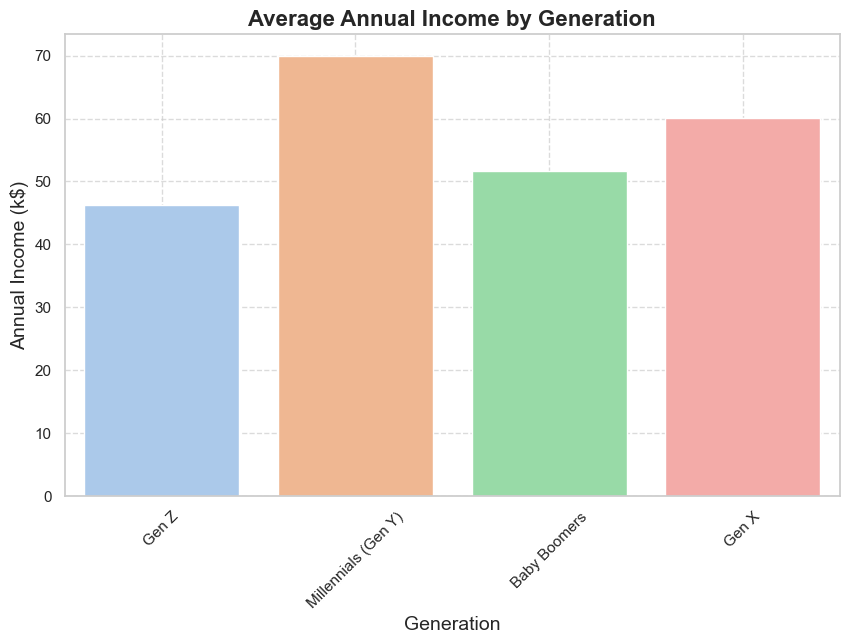

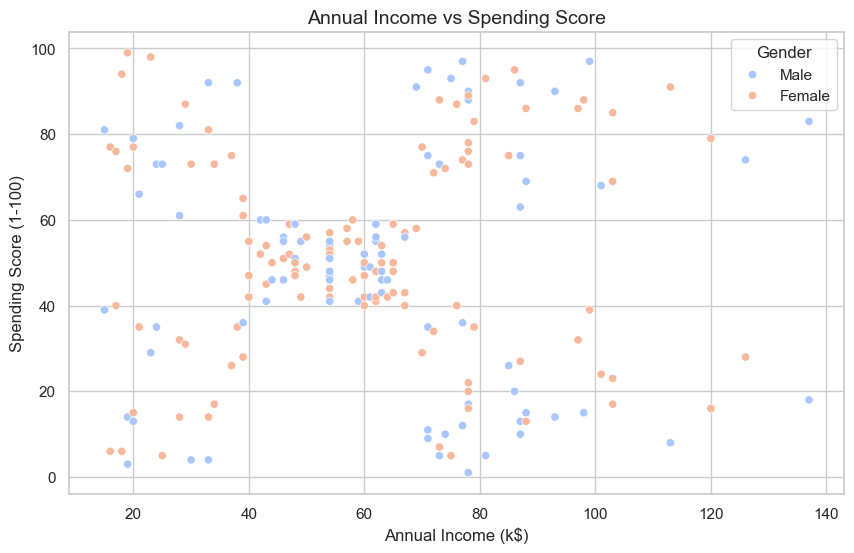

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("C:/Users/User/Desktop/ETDA WORK/Dataset/Mall_Customers.xlsx")




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


age_median = df['Age'].median()
print(f"Median Age: {age_median}")

age_mode = df['Age'].mode()
print(f"Mode Age: {age_mode.tolist()}")

Spending_Score_median = df['Spending Score (1-100)'].median()
print(f"Median Spending Score: {Spending_Score_median}")

Spending_Score = df['Spending Score (1-100)'].mode()
print(f"Mode Spending Score: {Spending_Score.tolist()}")




bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]  
labels = ['15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70']  
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)  

def assign_generation(age):
    if 12 <= age <= 26:
        return 'Gen Z'
    elif 27 <= age <= 42:
        return 'Millennials (Gen Y)'
    elif 43 <= age <= 58:
        return 'Gen X'
    elif 59 <= age <= 78:
        return 'Baby Boomers'
    else:
        return 'Other'


df['Generation'] = df['Age'].apply(assign_generation)




gen_spending_score = df.groupby('Generation')['Spending Score (1-100)'].mean().reset_index()
print(gen_spending_score)




average_income_by_age_group = df.groupby('Age Group', observed=True)['Annual Income (k$)'].mean().reset_index()



highest_income_group = average_income_by_age_group.loc[average_income_by_age_group['Annual Income (k$)'].idxmax()]


print(f"Age Group with the Highest Average Annual Income: {highest_income_group['Age Group']}")
print(f"Average Annual Income: {highest_income_group['Annual Income (k$)']:.2f}")  


average_spending_by_age_group = df.groupby('Age Group', observed=True)['Spending Score (1-100)'].mean().reset_index()


highest_spending_group = average_spending_by_age_group.loc[average_spending_by_age_group['Spending Score (1-100)'].idxmax()]


print(f"Age Group with the Highest Average Spending Score: {highest_spending_group['Age Group']}")
print(f"Average Spending Score: {highest_spending_group['Spending Score (1-100)']:.2f}")  # Format to 2 decimal places


print(df.describe())










sns.set_style("whitegrid")

unique_generations = df['Generation'].nunique()
custom_palette = sns.color_palette("pastel", unique_generations)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generation', y='Annual Income (k$)', data=df, hue='Generation', palette=custom_palette, dodge=False, legend=False, ci=None)


plt.title("Average Annual Income by Generation", fontsize=16, fontweight='bold')
plt.xlabel("Generation", fontsize=14)
plt.ylabel("Annual Income (k$)", fontsize=14)


plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.7)



sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='coolwarm')


plt.title('Annual Income vs Spending Score', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)


plt.legend(title='Gender')


plt.show()




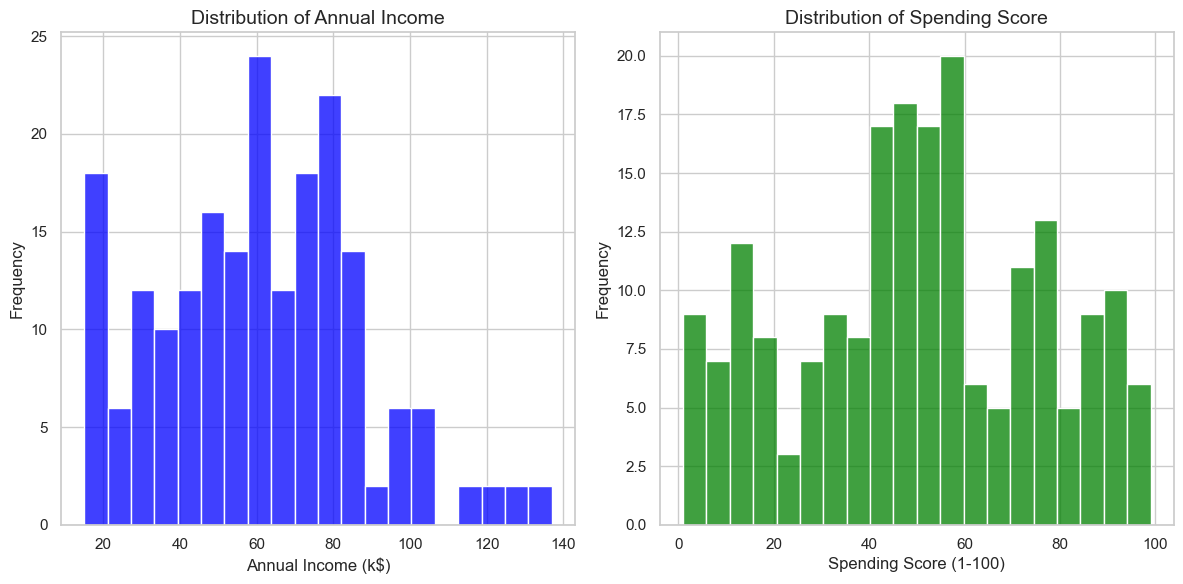

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_excel("C:/Users/User/Desktop/ETDA WORK/Dataset/Mall_Customers.xlsx")


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=False, color='blue')
plt.title('Distribution of Annual Income', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=False, color='green')
plt.title('Distribution of Spending Score', fontsize=14)
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


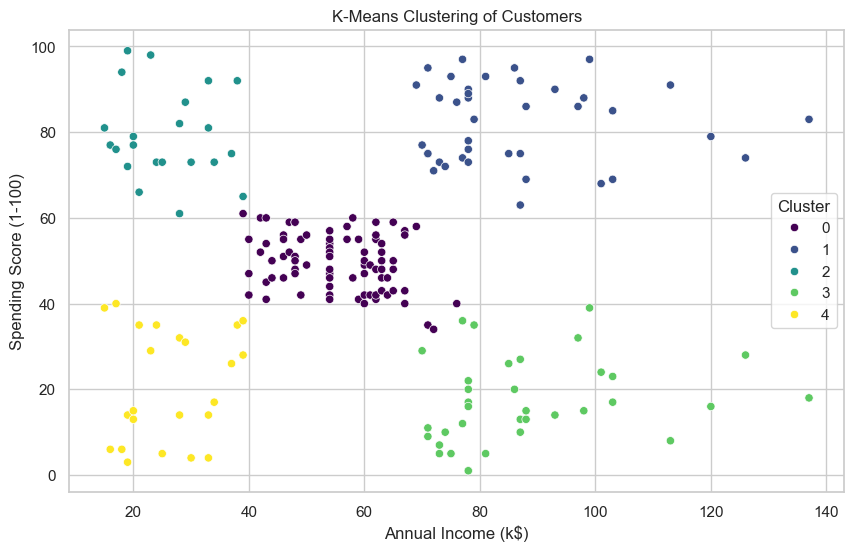

Cluster Centers (Scaled):
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]

Cluster Centers (Original Scale):
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [27]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df)
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


centers = kmeans.cluster_centers_
print("Cluster Centers (Scaled):")
print(centers)


centers_unscaled = scaler.inverse_transform(centers)
print("\nCluster Centers (Original Scale):")
print(centers_unscaled)





C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

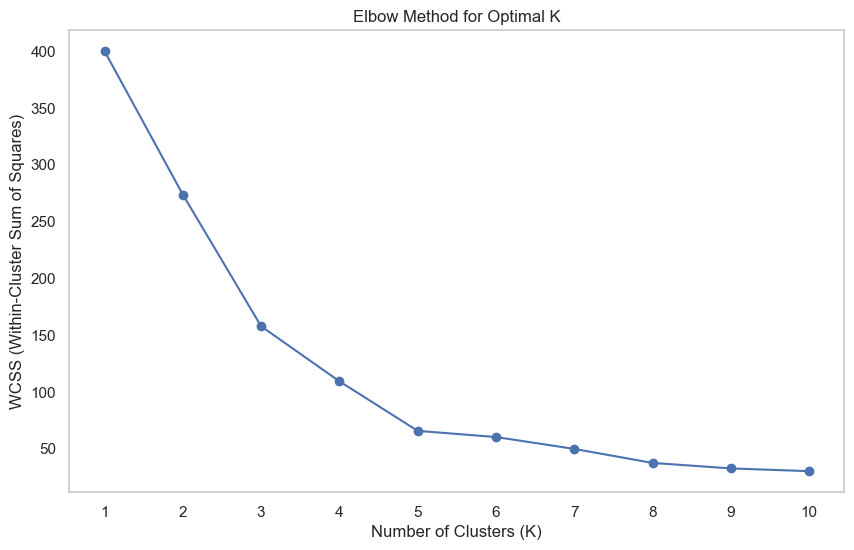

In [28]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
max_clusters = 10  # You can adjust this value

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # WCSS is stored in the inertia_ attribute


plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, max_clusters + 1))
plt.grid()
plt.show()



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_10440\1052926815.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)


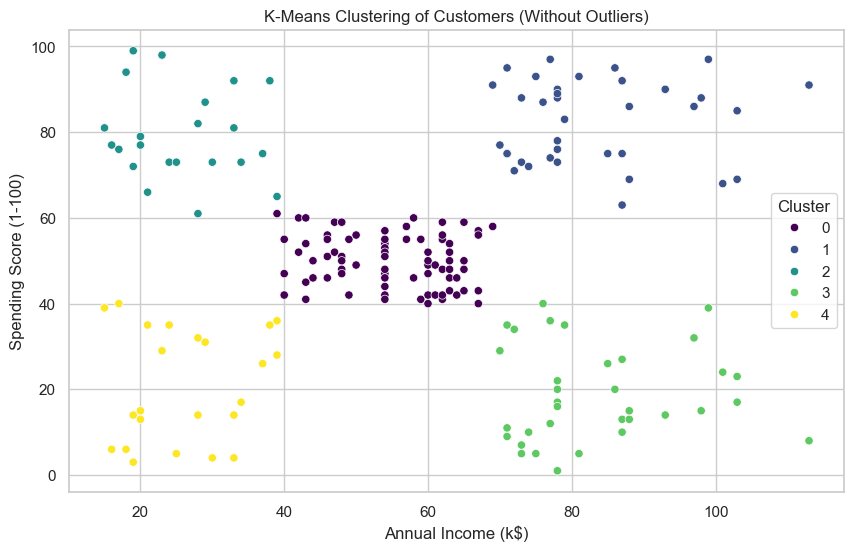

Cluster Centers (Scaled):
[[-0.16313816 -0.00744373]
 [ 1.03835017  1.25587936]
 [-1.38117095  1.13680429]
 [ 1.05534955 -1.2386864 ]
 [-1.35683927 -1.14290073]]

Cluster Centers (Original Scale):
[[54.61538462 50.02564103]
 [83.11111111 82.41666667]
 [25.72727273 79.36363636]
 [83.51428571 18.45714286]
 [26.30434783 20.91304348]]


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


threshold_income = 120
df_filtered = df[df['Annual Income (k$)'] < threshold_income]


X = df_filtered[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=5, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=df_filtered)
plt.title('K-Means Clustering of Customers (Without Outliers)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

centers = kmeans.cluster_centers_
print("Cluster Centers (Scaled):")
print(centers)


centers_unscaled = scaler.inverse_transform(centers)
print("\nCluster Centers (Original Scale):")
print(centers_unscaled)
